In [10]:
#importando as bibliotecas
import pandas as pd
import datetime
import glob
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df_parquet = pd.DataFrame()

In [12]:
#Caminho do arquivo
arquivo = '/content/drive/MyDrive/Dados/PROJETO-DATA-CANCER/curated/part-00000-4c17ff53-5e7b-4d56-b04e-e5b5f4623123-c000.snappy.parquet'

In [13]:
#Abrindo o arquivo parquet
df_parquet = pd.read_parquet(arquivo)

In [ ]:
#contagem do dataframe
df_parquet.count()

In [39]:
df_parquet.head(10)

,cod_paci,Gender,Age,estado,cidade,tipo_cancer,tipo_morte,data_morte,cancer_dead,ano_morte,Faixa_etaria,taxa_morte_tipo_cancer
0,360918.0,FEMININO,69.0,SERGIPE,ARACAJU,"COLO DO UTERO, SOE",NA,NA,0,NaN,65-74,0.143995
1,360871.0,FEMININO,51.0,SERGIPE,ARACAJU,PELE DE OUTRAS PARTES DA FACE,NA,NA,0,NaN,45-54,0.034634
2,360901.0,FEMININO,39.0,SERGIPE,ARACAJU,PELE DE OUTRAS PARTES DA FACE,CÂNCER,2015-10-03,1,2015.0,35-44,0.034634
3,360922.0,FEMININO,87.0,SERGIPE,ARACAJU,PELE DE OUTRAS PARTES DA FACE,NA,NA,0,NaN,85+,0.034634
4,360924.0,FEMININO,80.0,SERGIPE,ARACAJU,PELE DE OUTRAS PARTES DA FACE,NA,NA,0,NaN,75-84,0.034634
5,360929.0,MASCULINO,43.0,SERGIPE,ARACAJU,"LARINGE, SOE",NA,NA,0,NaN,35-44,0.372205
6,360933.0,FEMININO,30.0,SERGIPE,ARACAJU,"COLO DO UTERO, SOE",NA,NA,0,NaN,25-34,0.143995
7,360935.0,MASCULINO,56.0,SERGIPE,ARACAJU,"ASSOALHO DA BOCA, SOE",NA,NA,0,NaN,55-64,0.309426
8,360938.0,MASCULINO,72.0,SERGIPE,ARACAJU,PELE DA PALPEBRA E CANTO,NA,NA,0,NaN,65-74,0.033273
9,360945.0,FEMININO,51.0,SERGIPE,ARACAJU,"COLO DO UTERO, SOE",NA,NA,0,NaN,45-54,0.143995


In [16]:
count_gender = df_parquet['Gender'].value_counts()

In [38]:
count_gender.head()

FEMININO     971471
MASCULINO    806534
IGNORADO        171
Name: Gender, dtype: int64

In [18]:
#incidencia de cancer faixa etaria
incidencia_cancer = df_parquet.groupby(['Faixa_etaria', 'tipo_cancer']).size().reset_index(name='Count')


In [19]:
# Obter os 5 tipos de câncer com mais ocorrências para cada faixa etária
top5_cancer = incidencia_cancer.groupby('Faixa_etaria').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

In [ ]:
# Exibir o DataFrame de forma mais agradável usando estilo
top5_cancer.style.set_properties(**{'background-color': 'lightblue', 
                                    'color': 'black',
                                    'border-color': 'white'})

In [21]:
#Selecionando os 20 tipos de cancer que mais matam
grouped_data = df_parquet.groupby('tipo_cancer')['cancer_dead'].sum()
top_20_cancers = grouped_data.nlargest(20).index
filtered_data = df_parquet[df_parquet['tipo_cancer'].isin(top_20_cancers)]

In [ ]:
filtered_data.head(60)

In [1]:
#Grafico mortes por tipo de cancer
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(y="tipo_cancer", hue='cancer_dead', data=filtered_data).set_title('Mortes por tipo de cancer');

NameError: name 'plt' is not defined

In [ ]:
#Grafico mortes por faixa etaria
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(y="Faixa_etaria", hue='cancer_dead', data=df_parquet).set_title('Mortes por faixa etaria');

In [25]:
#filtrando por faixa etaria
df_filtered = df_parquet[df_parquet['Faixa_etaria'] == '25-34']

# Agrupar os dados por tipo de câncer e contar o número de mortes
cancer_count = df_filtered.groupby('tipo_cancer').size().reset_index(name='count')

# Ordenar os dados e selecionar os 20 cânceres que mais matam
top_20_cancers = cancer_count.sort_values('count', ascending=False).head(20)

In [ ]:

#Top 20 cânceres que mais matam na faixa etária de 25-34 anos
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='count', y='tipo_cancer', data=top_20_cancers, palette='muted', ax=ax)
ax.set_title('Top 20 cânceres que mais matam na faixa etária de 25-34 anos')
ax.set_xlabel('Número de mortes')
ax.set_ylabel('Tipo de câncer')
plt.show()

In [27]:
#filtrando por faixa etaria
df_filtered2 = df_parquet[df_parquet['Faixa_etaria'] == '35-44']

# Agrupar os dados por tipo de câncer e contar o número de mortes
cancer_count = df_filtered2.groupby('tipo_cancer').size().reset_index(name='count')

# Ordenar os dados e selecionar os 20 cânceres que mais matam
top_20_cancers = cancer_count.sort_values('count', ascending=False).head(20)

In [ ]:
#Grafico Top 20 cânceres que mais matam na faixa etária de 35-44 anos
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='count', y='tipo_cancer', data=top_20_cancers, palette='muted', ax=ax)
ax.set_title('Top 20 cânceres que mais matam na faixa etária de 35-44 anos')
ax.set_xlabel('Número de mortes')
ax.set_ylabel('Tipo de câncer')
plt.show()

In [29]:
#filtrando por faixa etaria
df_filtered3 = df_parquet[df_parquet['Faixa_etaria'] == '45-54']

# Agrupar os dados por tipo de câncer e contar o número de mortes
cancer_count = df_filtered3.groupby('tipo_cancer').size().reset_index(name='count')

# Ordenar os dados e selecionar os 20 cânceres que mais matam
top_20_cancers = cancer_count.sort_values('count', ascending=False).head(20)

In [ ]:
#Grafico Top 20 cânceres que mais matam na faixa etária de 45-54 anos
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='count', y='tipo_cancer', data=top_20_cancers, palette='muted', ax=ax)
ax.set_title('Top 20 cânceres que mais matam na faixa etária de 45-54 anos')
ax.set_xlabel('Número de mortes')
ax.set_ylabel('Tipo de câncer')
plt.show()

In [31]:
#filtrando por faixa etaria
df_filtered4 = df_parquet[df_parquet['Faixa_etaria'] == '55-64']

# Agrupar os dados por tipo de câncer e contar o número de mortes
cancer_count = df_filtered4.groupby('tipo_cancer').size().reset_index(name='count')

# Ordenar os dados e selecionar os 20 cânceres que mais matam
top_20_cancers = cancer_count.sort_values('count', ascending=False).head(20)

In [ ]:
#Grafico Top 20 cânceres que mais matam na faixa etária de 55-64 anos
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='count', y='tipo_cancer', data=top_20_cancers, palette='muted', ax=ax)
ax.set_title('Top 20 cânceres que mais matam na faixa etária de 55-64 anos')
ax.set_xlabel('Número de mortes')
ax.set_ylabel('Tipo de câncer')
plt.show()

In [33]:
#filtrando por faixa etaria
df_filtered5 = df_parquet[df_parquet['Faixa_etaria'] == '65-74']

# Agrupar os dados por tipo de câncer e contar o número de mortes
cancer_count = df_filtered5.groupby('tipo_cancer').size().reset_index(name='count')

# Ordenar os dados e selecionar os 20 cânceres que mais matam
top_20_cancers = cancer_count.sort_values('count', ascending=False).head(20)

In [ ]:
#Grafico Top 20 cânceres que mais matam na faixa etária de 45-54 anos
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='count', y='tipo_cancer', data=top_20_cancers, palette='muted', ax=ax)
ax.set_title('Top 20 cânceres que mais matam na faixa etária de 45-54 anos')
ax.set_xlabel('Número de mortes')
ax.set_ylabel('Tipo de câncer')
plt.show()

In [42]:
#filtrando por estado que mais ocorrem mortes por cancer
df_filtered2 = df_parquet[df_parquet['cancer_dead'] == 1]
state_death_count = df_filtered2.groupby('estado').size().reset_index(name='count')

In [ ]:
#Grafico mortes por estado
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='count', y='estado', data=state_death_count, palette='muted', ax=ax)
ax.set_title('Mortes por câncer por estado')
ax.set_xlabel('Número de mortes')
ax.set_ylabel('Estado')
plt.show()

In [45]:
#filtrando por cidades que mais ocorrem mortes por cancer
df_filtered3 = df_parquet[df_parquet['cancer_dead'] == 1]
city_death_count = df_filtered3.groupby('cidade').size().reset_index(name='count')
city_death_count = city_death_count.sort_values('count', ascending=False).head(10)

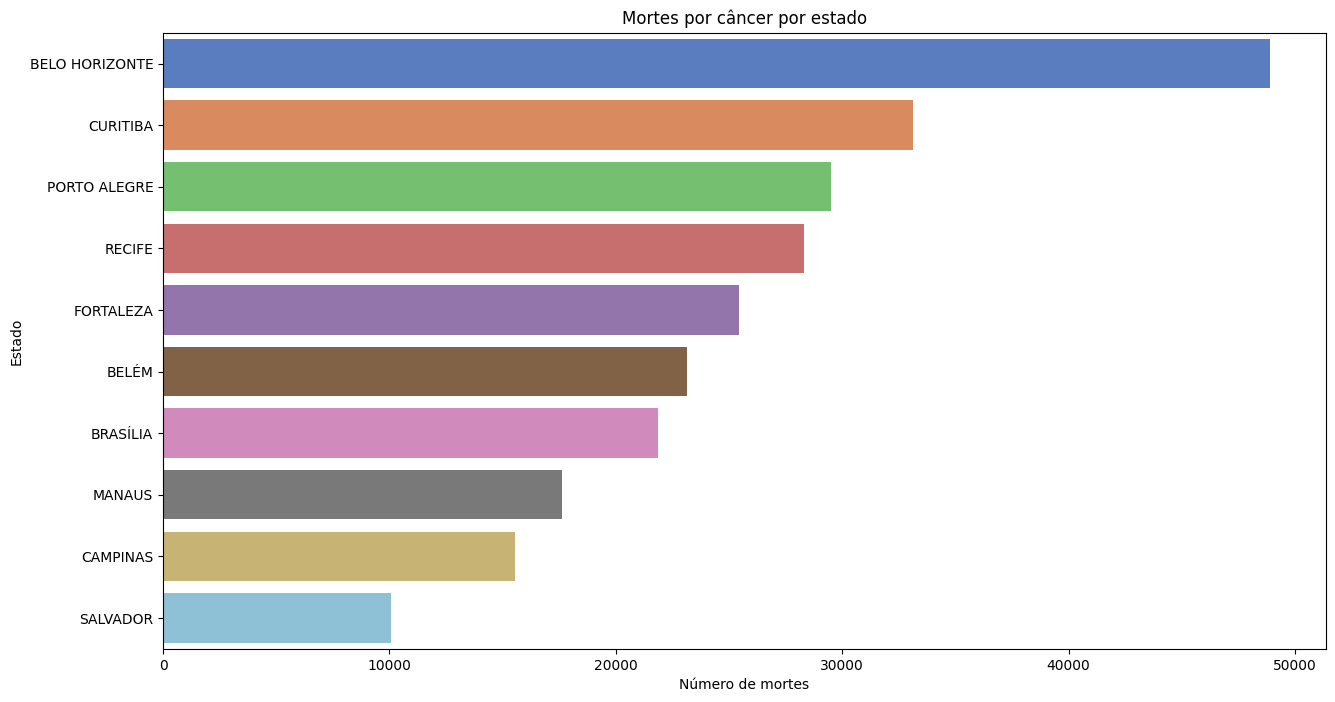

In [46]:
#Grafico mortes por cidade
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='count', y='cidade', data=city_death_count, palette='muted', ax=ax)
ax.set_title('Mortes por câncer por cidade')
ax.set_xlabel('Número de mortes')
ax.set_ylabel('Estado')
plt.show()

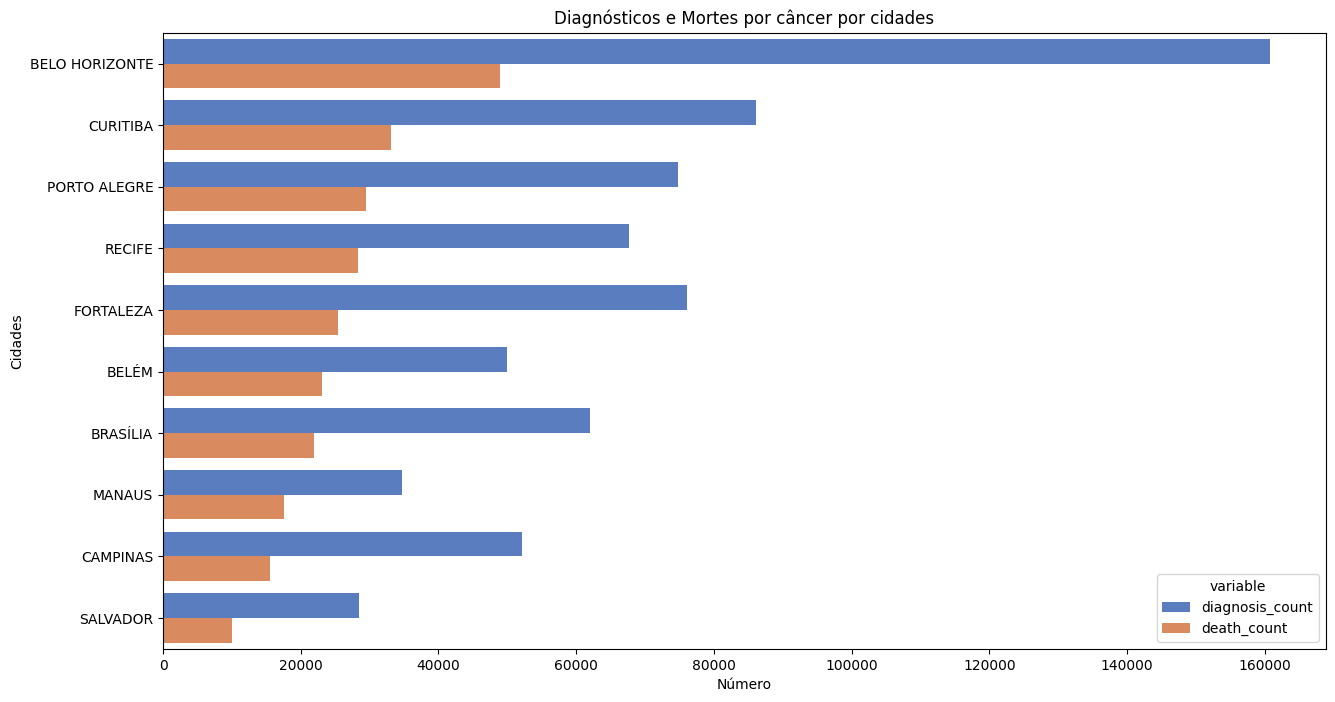

In [47]:
# Contando o total de diagnósticos por cidade
total_diagnosis = df_parquet.groupby('cidade').size().reset_index(name='diagnosis_count')

# Filtrando apenas as mortes por câncer
df_filtered4 = df_parquet[df_parquet['cancer_dead'] == 1]

# Contando as mortes por cidade
city_death_diag = df_filtered4.groupby('cidade').size().reset_index(name='death_count')

# Unindo os dataframes
merged_data = pd.merge(total_diagnosis, city_death_diag, on='cidade')

# Ordenando as cidades por número de mortes e pegando as top 10
merged_data = merged_data.sort_values('death_count', ascending=False).head(10)

# Ajustando os dados para plotagem
melted_data = merged_data.melt(id_vars='cidade', value_vars=['diagnosis_count', 'death_count'])

# Plotando o gráfico
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='value', y='cidade', hue='variable', data=melted_data, palette='muted', ax=ax)
ax.set_title('Diagnósticos e Mortes por câncer por cidades')
ax.set_xlabel('Número')
ax.set_ylabel('Cidades')
plt.show()
